# Practice 6 (Dimension Reduction)

## Standardization and PCA
Standardization (mean centering and normalization) can be implemented in Python using the following:

- from sklearn.preprocessing import StandardScaler

- scaler = StandardScaler()
- scaler.fit(X) # fit scalar to data (find mean and var)
- scaler.transform(X) # to sub. Mean and divide by SD

PCA can be implemented in Python using the following:

- from sklearn.decomposition import PCA

- C = PCA(5) # 5 e.g. is the number of dimensions (K)
- C.fit(X) # to find principal vectors from data X
- print(C.components_, C.explained_variance_) # to show principal vectors and eigenvalues

- C.transform(X) # to apply PC to dataset X


## 1) Spectrometry
Write a classifier code which applies dimension reduction to the spectrometry dataset as follows:
- Consider the data in the file ‘spectrometer_dataset_2.csv’
- Use a train/test split with 1/3 of the dataset for testing
- Use PCA to reduce the dimension of the dataset from 8 to 2
- Train a classifier using the 2 obtained features
- Test using the testset

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# load spectrometer data
df = pd.read_csv('spectrometer_dataset_2.csv') #print(df.shape) >>> (200, 9)
#print(df.head())
## pandas.DataFrame.to_numpy: converts the DataFrame to a NumPy array.
data = df.to_numpy() #print(data.shape) >>> (200, 9)
x = data[:,0:8]
y = data[:,8]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

## standardization (mean centering and normalization)
# standardize
scaler = StandardScaler()
scaler.fit(X_train) ## scalar to data (find mean and var)
#or#print(np.mean(X_train,axis=0), np.var(X_train,axis=0))
#print(scaler.mean_, scaler.var_)

U_train = scaler.transform(X_train) ## to subtract mean and divide by standard deviation (SD)
#print(np.mean(U_train,axis=0), np.var(U_train,axis=0))
##print(U_train.shape) >>> (134, 8)

## PCA implementation
# applying PCA with K=2
C = PCA(2)
C.fit(U_train)
#print(C.components_,C.explained_variance_) ## to show principal vectors and eigenvalues
## applying PC to dataset U_train
X_train_pca = C.transform(U_train) ##print(X_train_pca.shape) >>> (134, 2)

# learn the model
model = LogisticRegression()
model.fit(X_train_pca,y_train)

# test
scaler.fit(X_test) ## scalar to data (find mean and var)
U_test = scaler.transform(X_test)
X_test_pca = C.transform(U_test)
y_pred = model.predict(X_test_pca)
print(confusion_matrix(y_test,y_pred), accuracy_score(y_test,y_pred))

[[33  0]
 [ 0 33]] 1.0


## 2) DIY: MNIST
For the MNIST dataset, training using all 28x28 pixels is slow
- One can scale the image to reduce the dimension
- Or use PCA
Use PCA to reduce the dimensions to 𝐾 = 𝐿² for some 𝐿 (e.g. 𝐿 = 5) and train and test a classifier. Compare the result with using a scaled image with 𝐿 × 𝐿 pixels.

## 3) Movie Recommender System
Design a recommendation system using PCA as follows:
- Use the file ‘recom.csv’
- Use all except last user for training
- Apply PCA to obtain 𝐾 typical users (e.g. 𝐾 = 5)
- Use typical users to recommend movie genres to last user

[ 0.30272246 -0.17113245 -0.30826724  0.32793302  0.26212099 -0.23437571
 -0.31194745  0.05918652  0.05918652  0.32793302  0.26212099 -0.34975414
  0.05918652  0.13810483 -0.35692567]
8.213300531902087

[-0.20620972 -0.12399031 -0.12098451 -0.24166207 -0.18818917 -0.15090673
 -0.12673013  0.46139674  0.46139674 -0.24166207 -0.18818917 -0.18346321
  0.46139674 -0.08636559 -0.14568208]
5.340920884008803

[ 0.28816718  0.33933452 -0.05941689 -0.03054651 -0.37286668 -0.32314831
  0.01692551 -0.04224188 -0.04224188 -0.03054651 -0.37286668  0.04902324
 -0.04224188  0.62937223 -0.09888869]
2.3579424192013745

[-0.04169454 -0.52343627 -0.24492453 -0.03878195 -0.27292908  0.4831291
 -0.43369261 -0.13504871 -0.13504871 -0.03878195 -0.27292908  0.06714741
 -0.13504871  0.17043989 -0.05023316]
1.588166982691362

[ 0.20816309 -0.58449915  0.68976283 -0.02189517  0.02861254 -0.14337606
  0.17659795  0.04569618  0.04569618 -0.02189517  0.02861254  0.07333912
  0.04569618  0.21627115 -0.16278871]
0.49

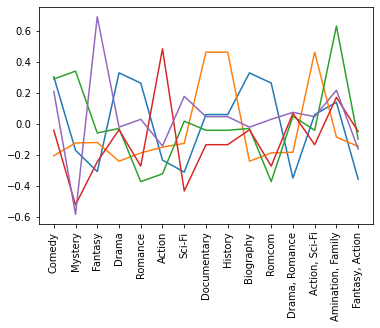

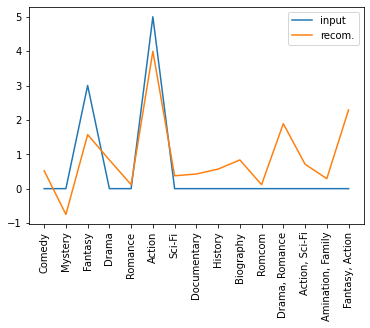

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('recom.csv')
#print(df)
X = df.to_numpy() ##print(X.shape) >>> (15, 30)
#print(X)

n_users = len(x[0,1:]) ##print(n_users) >>> 29
##Use all except last user for training
X_train = X[:,1:n_users].T ##print(X_train.shape) >>> (28, 15)
#print(X_train)
X_new = X[:,n_users].reshape(1,-1) ##print(X_new.shape) >>> (1, 15)
#we can use -1 instead of n_users (the last component)
#print(X_new)

# find typical users (the principal components are the 'typical users')
K = 5
scaler = StandardScaler()
scaler.fit(X_train)
U_train = scaler.transform(X_train)
C = PCA(K)
C.fit(U_train)

#print(C.components_,C.explained_variance_) # to show principal vectors and eigenvalues

for i in range(K):
    ref_user = (C.components_[i,:])
    print(f'{C.components_[i,:]}\n{C.explained_variance_[i]}\n')
    plt.plot(ref_user)
plt.xticks([i for i in range(15)], X[:,0], rotation=90)
plt.show()

# new user: Transform using scaler and PCA
# Encoding
U_new = scaler.transform(X_new)
W_new = C.transform(U_new)
#print(W_new.shape)

# Decoding (to bring back to the same space as the original data X_new, i.e., with features equal genres)
ut_new = np.matmul(W_new, C.components_)
Xt_new = ut_new*np.sqrt(scaler.var_) + scaler.mean_ 
#print(xt_new)
plt.plot(X_new[0,:])
plt.plot(Xt_new[0,:])
plt.xticks([i for i in range(15)], X[:,0], rotation=90)
plt.legend(['input', 'recom.'])
plt.show()